In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-vs-human-content-detection-dataset-2026/ai_human_detection_v1.csv


In [2]:
import os

for root, dirs, files in os.walk("/kaggle/input"):
    for name in files:
        print(os.path.join(root, name))

/kaggle/input/ai-vs-human-content-detection-dataset-2026/ai_human_detection_v1.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("/kaggle/input/ai-vs-human-content-detection-dataset-2026/ai_human_detection_v1.csv")
df.head()

,id,text,human_or_ai,source_model,prompt,domain,language,edit_level,word_count,generation_date,version
0,e37e31c0-35d0-486d-9760-efadd4e0e289,Aprender programación en Python es fácil . Pri...,human,Human,NaN,Technical Blog,es,none,34,2026-01-29T08:38:18.272755,v1.0
1,68e294cf-a499-4fbf-8616-2d6324570be9,Error: 400 Client Error: Bad Request for url: ...,ai,gemma2-9b-it,Discute el papel de la tecnología en el aprend...,Education,es,none,9,2026-01-29T08:58:20.717225,v1.0
2,b5e06ef0-9758-471f-81dc-182c6117ee81,Error: 404 Client Error: Not Found for url: ht...,ai,gemma2-9b-itllama-3.3-70b-versatile,Create a cold outreach email for business part...,Email,en,none,9,2026-01-29T09:13:20.114765,v1.0
3,6177fc40-1567-445b-af15-f3250ddd3403,**Global Economic Trends: A Shifting Landscape...,ai,llama-3.1-8b-instant,Write about economic trends affecting global m...,News,en,none,558,2026-01-29T08:39:55.917663,v1.0
4,192a9615-ed51-4750-b649-d18f8882f555,"""Recuerda que tú eres fuerte, capaz y única. N...",ai,llama-3.1-8b-instant,Escribe una publicación inspiradora para redes...,Social Media,es,none,147,2026-01-29T08:42:52.451370,v1.0


In [4]:
df.shape
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               686 non-null    object
 1   text             686 non-null    object
 2   human_or_ai      686 non-null    object
 3   source_model     686 non-null    object
 4   prompt           505 non-null    object
 5   domain           686 non-null    object
 6   language         686 non-null    object
 7   edit_level       686 non-null    object
 8   word_count       686 non-null    int64 
 9   generation_date  686 non-null    object
 10  version          686 non-null    object
dtypes: int64(1), object(10)
memory usage: 59.1+ KB


,id,text,human_or_ai,source_model,prompt,domain,language,edit_level,word_count,generation_date,version
count,686,686,686,686,505,686,686,686,686.000000,686,686
unique,686,686,3,4,163,6,7,3,NaN,686,1
top,9063af15-22f8-411e-b7fc-4b4670e6dbc2,Dear Manager\n\nMain agle week chutti ke liye ...,ai,llama-3.1-8b-instant,Write product description for innovative tech ...,Social Media,en,none,NaN,2026-01-29T08:38:18.291334,v1.0
freq,1,1,335,499,15,121,246,516,NaN,1,686
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.300292,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.517607,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,393.500000,NaN,NaN


In [5]:
df.isnull().sum().sort_values(ascending=False)

prompt             181
text                 0
id                   0
human_or_ai          0
source_model         0
domain               0
language             0
edit_level           0
word_count           0
generation_date      0
version              0
dtype: int64

In [6]:
import pandas as pd

# Eksik prompt değerlerini bul
df['prompt'] = df['prompt'].fillna('')

# Metin temizle
for col in ['text', 'prompt']:
    df[col] = df[col].str.strip().replace(r'\s+', ' ', regex=True)

# Tarih dönüştür
df['generation_date'] = pd.to_datetime(df['generation_date'], errors='coerce')

# Kategorik kolonları standardize et
cat_cols = ['human_or_ai', 'source_model', 'domain', 'language', 'edit_level', 'version']
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.lower().str.strip())

# Tekrar edenleri sil
df = df.drop_duplicates()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               686 non-null    object        
 1   text             686 non-null    object        
 2   human_or_ai      686 non-null    object        
 3   source_model     686 non-null    object        
 4   prompt           686 non-null    object        
 5   domain           686 non-null    object        
 6   language         686 non-null    object        
 7   edit_level       686 non-null    object        
 8   word_count       686 non-null    int64         
 9   generation_date  686 non-null    datetime64[ns]
 10  version          686 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 59.1+ KB


In [7]:
df['text_length'] = df['text'].str.len()
df[['word_count', 'text_length']].corr()


,word_count,text_length
word_count,1.000000,0.978353
text_length,0.978353,1.000000


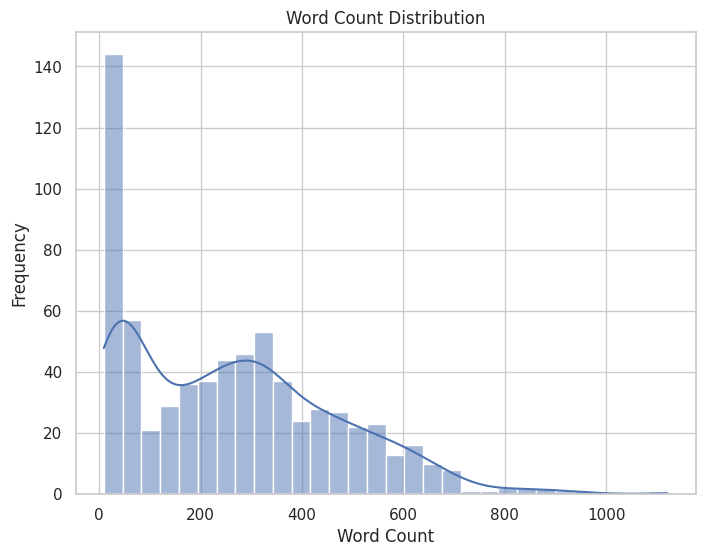

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


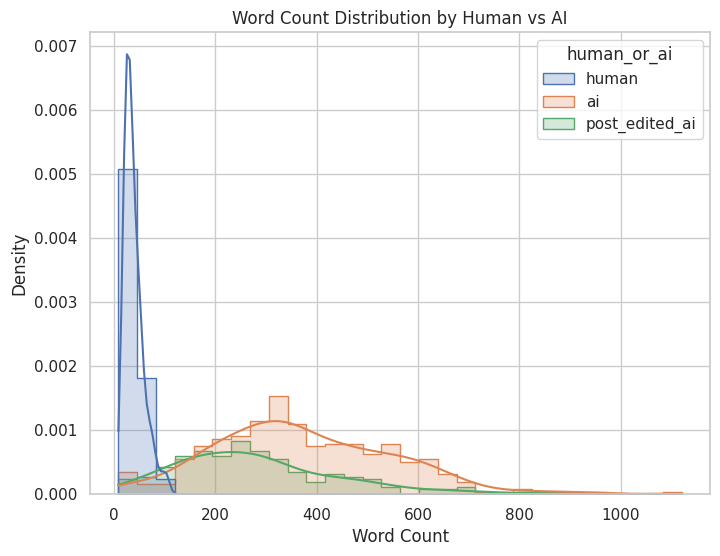

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x='word_count',
    hue='human_or_ai',
    bins=30,
    kde=True,
    element='step',
    stat='density'
)
plt.title('Word Count Distribution by Human vs AI')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.show()


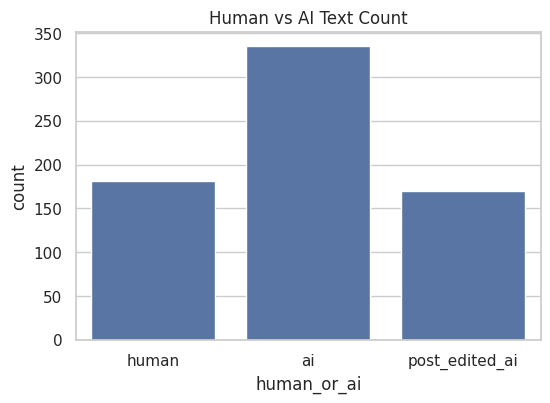

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='human_or_ai', data=df)
plt.title('Human vs AI Text Count')
plt.show()


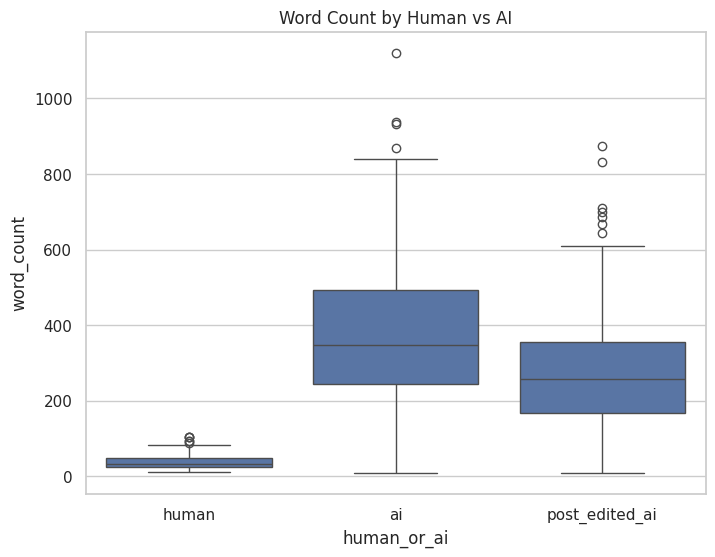

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x='human_or_ai', y='word_count', data=df)
plt.title('Word Count by Human vs AI')
plt.show()


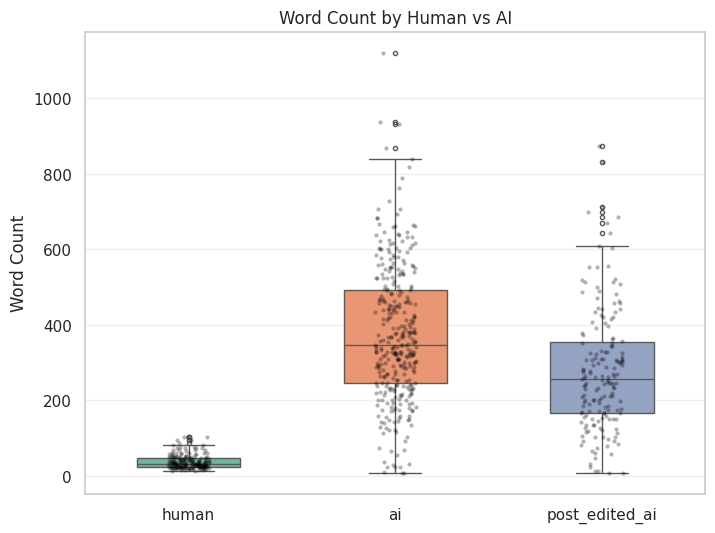

In [12]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data=df,
    x='human_or_ai',
    y='word_count',
    hue='human_or_ai',
    palette='Set2',
    legend=False,
    width=0.5,
    fliersize=3
)

sns.stripplot(
    data=df,
    x='human_or_ai',
    y='word_count',
    color='black',
    alpha=0.3,
    size=3,
    jitter=True
)

plt.title('Word Count by Human vs AI')
plt.xlabel('')
plt.ylabel('Word Count')
plt.grid(axis='y', alpha=0.3)
plt.show()


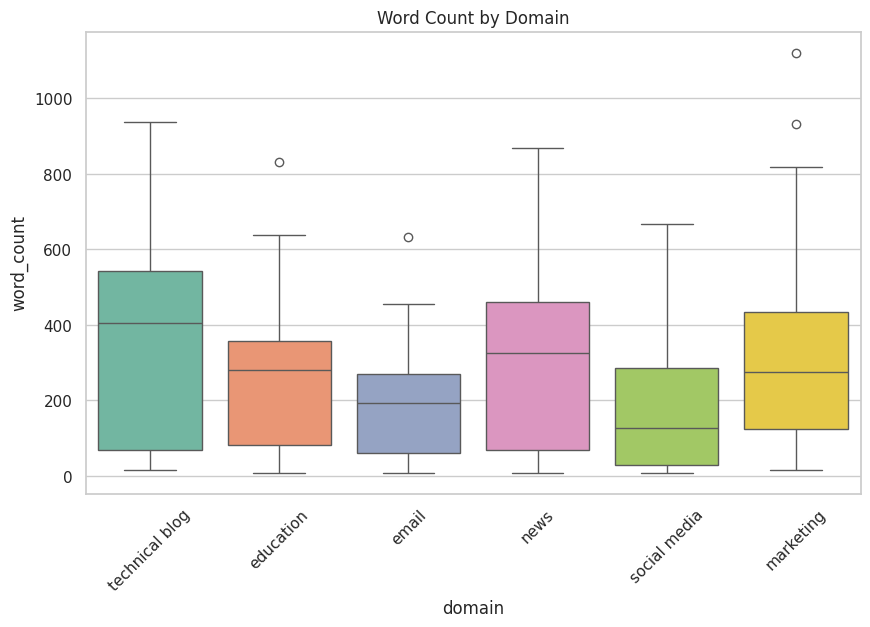

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='domain',
    y='word_count',
    hue='domain',
    palette='Set2',
    legend=False
)
plt.xticks(rotation=45)
plt.title('Word Count by Domain')
plt.show()